Name: **Ghulam Qadir Junejo**

CMS-ID: **023-22-0126**

# Task-1 Tweet Emotions Classifications
 Diving into Artificial Neural Network.


In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/tweet_emotions.csv')
display(df.head(10))

,Id,Tweet,Label
0,145353048817012000,Thinks that @melbahughes had a great 50th birt...,surprise
1,144279638024257000,"Como una expresiÃ³n tan simple, una sola oraci...",sadness
2,140499585285111000,the moment when you get another follower and y...,joy
3,145207578270507000,Be the greatest dancer of your life! practice ...,joy
4,139502146390470000,eww.. my moms starting to make her annual rum ...,disgust
5,146042696899887000,If ur heart hurts all the time for tht person ...,joy
6,145492569609084000,"I feel awful, and it's way too freaking early....",joy
7,145903955229151000,So chuffed for safc fans! Bet me dar comes in ...,joy
8,142717613234069000,Making art and viewing art are different at th...,fear
9,144183822873927000,"Soooo dooowwwn!! Move on, get some sleep... Me...",anger


In [77]:
 df.shape[0] ## It will tell us the number of row

21051

In [78]:
df.shape[1] # it will tell us the number of columns

3

In [79]:
df.describe()

,Id
count,2.105100e+04
mean,1.422121e+17
std,2.458756e+15
min,1.360601e+17
25%,1.400829e+17
50%,1.423464e+17
75%,1.443362e+17
max,1.462843e+17


In [80]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21051 entries, 0 to 21050
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      21051 non-null  int64 
 1   Tweet   21051 non-null  object
 2   Label   21051 non-null  object
dtypes: int64(1), object(2)
memory usage: 493.5+ KB
None


# Preprocessing


In [81]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Removing the other signs from text

In [82]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_tweet'] = df['Tweet'].apply(clean_text)


In [83]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['Label'])

# One-hot encode labels
y = to_categorical(df['label'])

print("Classes:", encoder.classes_)

Classes: ['anger' 'disgust' 'fear' 'joy' 'sadness' 'surprise']


In [84]:
max_words = 10000  #this is a limit vocabulary size
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_tweet'])

# Converting text to binary matrix
X = tokenizer.texts_to_matrix(df['clean_tweet'], mode='binary')
print(X.shape, y.shape)


(21051, 10000) (21051, 6)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

num_classes = y.shape[1]

model = Sequential([
    Dense(512, activation='relu', input_shape=(max_words,)),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,253,382 (20.04 MB)

 Trainable params: 5,253,382 (20.04 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.3791 - loss: 1.6021 - val_accuracy: 0.5273 - val_loss: 1.2671
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6426 - loss: 1.0143 - val_accuracy: 0.5668 - val_loss: 1.1695
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7993 - loss: 0.6110 - val_accuracy: 0.5677 - val_loss: 1.2865
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9183 - loss: 0.3096 - val_accuracy: 0.5659 - val_loss: 1.4759
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9769 - loss: 0.1296 - val_accuracy: 0.5555 - val_loss: 1.6858


In [89]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 55.78%


In [90]:
new_texts = ["I am so good today!", "hahahaha."]
seqs = tokenizer.texts_to_matrix(new_texts, mode='binary')
preds = model.predict(seqs)
predicted_labels = encoder.inverse_transform(preds.argmax(axis=1))
print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
['joy' 'surprise']


# BBC Sports News Classification.

In [91]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/bbcsports.csv')
display(df.head(10))

,Unnamed: 0,text,label
0,0,Sharapova overcomes tough Molik\n\nWimbledon c...,tennis
1,1,GB players warned over security\n\nBritain's D...,tennis
2,2,Federer wins title in Rotterdam\n\nWorld numbe...,tennis
3,3,Mauresmo fights back to win title\n\nWorld num...,tennis
4,4,Agassi into second round in Dubai\n\nFourth se...,tennis
5,5,Henman hopes ended in Dubai rain\n\nThird seed...,tennis
6,6,Injured Roddick quits in Memphis\n\nAndy Roddi...,tennis
7,7,Clijsters sets up Venus match-up\n\nKim Clijst...,tennis
8,8,Australia miss Molik for Fed Cup\n\nAustralia ...,tennis
9,9,Roddick to face Saulnier in final\n\nAndy Rodd...,tennis


In [92]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  737 non-null    int64 
 1   text        737 non-null    object
 2   label       737 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.4+ KB
None


In [93]:
df.shape[0]
#df.shape[1]
#df.describe()

737

In [94]:
#Playing with techniques of preprocessing
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [95]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [96]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

# One-hot encode labels
y = to_categorical(df['label'])

print("Classes:", encoder.classes_)

Classes: ['athletics' 'cricket' 'football' 'rugby' 'tennis']


In [97]:
max_words = 10000  # this is limit vocabulary size
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

# Convert text to binary matrix
X = tokenizer.texts_to_matrix(df['clean_text'], mode='binary')
print(X.shape, y.shape)

(737, 10000) (737, 5)


In [98]:
X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

num_classes = y.shape[1]

model = Sequential([
    Dense(512, activation='relu', input_shape=(max_words,)),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,253,125 (20.04 MB)

 Trainable params: 5,253,125 (20.04 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:
history = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=512,
    validation_split=0.1,
    verbose=1
)

Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.1940 - loss: 1.5991 - val_accuracy: 0.5932 - val_loss: 1.1473
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6310 - loss: 0.9637 - val_accuracy: 0.8475 - val_loss: 0.7659


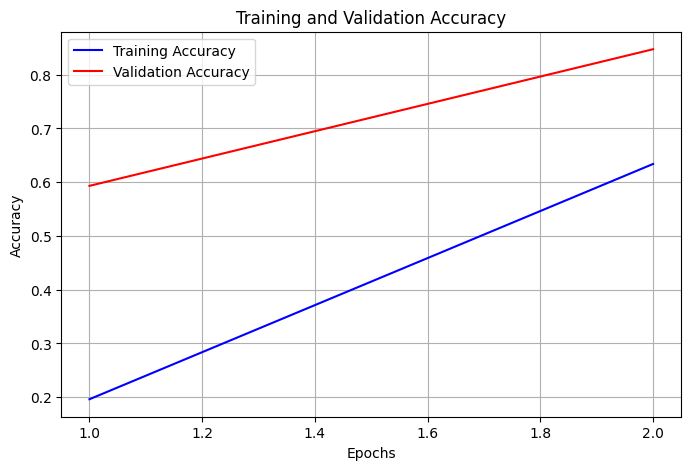

In [102]:
import matplotlib.pyplot as plt

# Get training history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [103]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 83.78%
